# Machine Learning Practical No.2

                                                                  
Regression Analysis

  Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:Pre-process the  
  dataset.Identify outliers.Check the correlation.Implement linear regression and ridge, Lasso regression models.
  Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"uber.csv")#Loading the dataset
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.isnull().sum()#This displays the number of null values in each column
#We can see that there are no null values in our dataset that's good
#If there were any null values then we would have to fill those or remove them
#before applying any Machine Learning Model/Algorithm

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.columns#printing the name of the columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)
#.drop() function in pandas is used to remove rows or columns from a DataFrame.
#Here, it’s used to remove columns.
#'Unnamed: 0' → Usually an extra index column that appears automatically when a CSV file is saved with the index.
#It doesn’t contain any useful data — just row numbers repeated.

#'key' → A column that contains unique IDs for each record (like trip ID).
#It’s not helpful for prediction or correlation, so we remove it too.

#axis=1 → removes columns

#inplace=True means the change will be permanent in the dataset

In [8]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [9]:
df= df.dropna()#Dropping records(rows) having atleast one null value in it

In [10]:
df#printing the dataset see in the output now 199999 rows are there instead of 200000 rows

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [11]:
df.isnull().sum()#This displays the number of null values in each column
#We can see that there are no null values in our dataset that's good
#If there were any null values then we would have to fill those or remove them
#before applying any Machine Learning Model/Algorithm

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)#dropping the duplicate records from the dataset

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_14768\771231220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)#dropping the duplicate records from the dataset


In [13]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [14]:
df.describe()#it gives the statistical summary of all the numeric columns of the dataset like
#the mean,max and min value,standard deviation etc for that particular column

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [15]:
unique_passengers = df['passenger_count'].unique()#It gives the number of unique values 
#present in the column named passenger_count of the dataset
unique_passengers 

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [16]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]#Ensuring that dataset
#only contains realistic values because in Uber ride the maximum passengers can be 6 and minimum has to
#be 1

#In Uber XL cabs 6 passengers are allowed normal cars have 4 passengers allowded

In [17]:
df#Now see the rows having the pasenger count value more than 6 and less than 1 were removed

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [18]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199290.000000,199290.000000,199290.000000,199290.000000,199290.000000,199290.000000
mean,11.366713,-72.529899,39.937068,-72.527187,39.924829,1.689493
std,9.910588,11.434766,7.723776,13.121348,6.795558,1.305420
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992065,40.734796,-73.991410,40.733826,1.000000
50%,8.500000,-73.981825,40.752585,-73.980095,40.753041,1.000000
75%,12.500000,-73.967158,40.767157,-73.963663,40.767995,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


In [19]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [20]:
df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_longitude'].between(-180, 180))
]

#See latitudes ranges from -90 to 90 on Earth if the latiude value is other than this range then its impossible to
#point that location on Earth thats why we have ensured that the pickup and drop off latitudes are between 
#-90 to 90 only to make the data realistic

#Similarly the Longitude values ranges from -180 to 180 if the value of longitude is anything than this 
#then the value is incorrect

#So we are filtering data here

In [21]:
df#See now for filtered data again rows are decreased because some records
#had unrealistic values

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_datetime    199278 non-null  object 
 2   pickup_longitude   199278 non-null  float64
 3   pickup_latitude    199278 non-null  float64
 4   dropoff_longitude  199278 non-null  float64
 5   dropoff_latitude   199278 non-null  float64
 6   passenger_count    199278 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


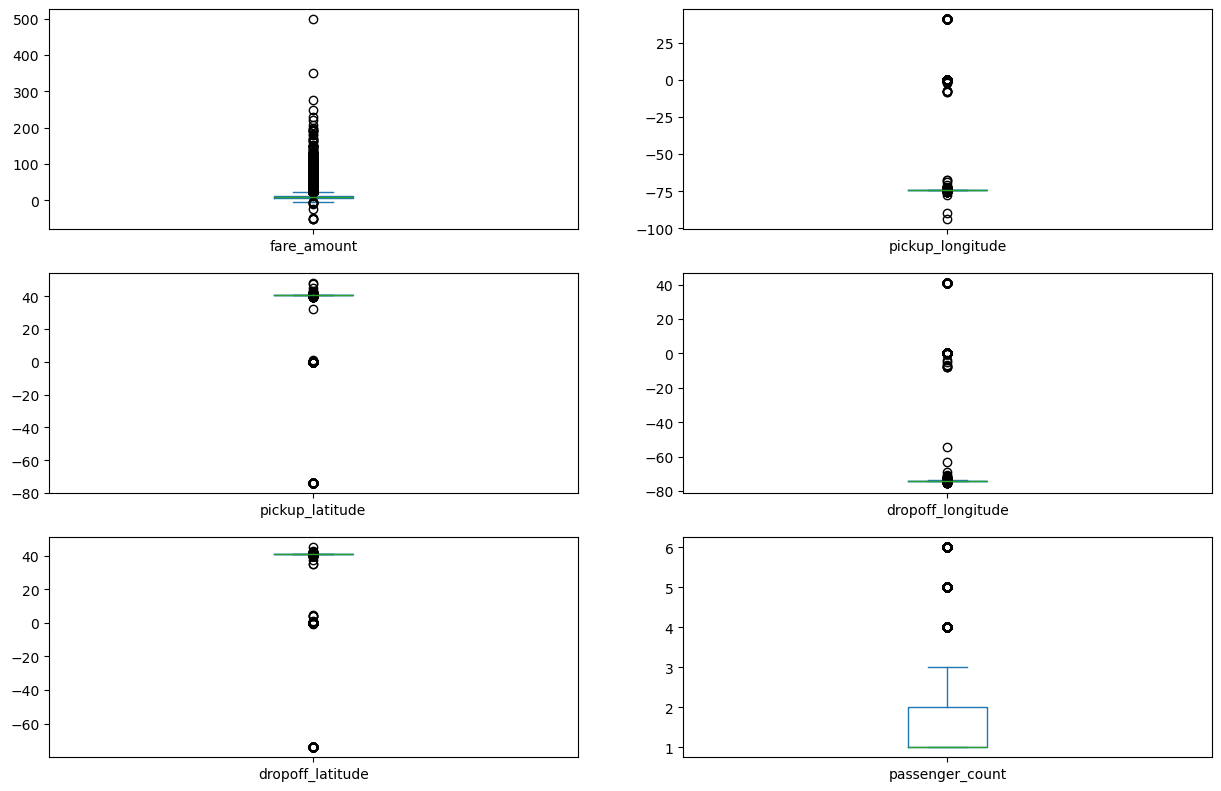

In [23]:
# Identify outliers using box plots
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
plt.show()

#df.plot(kind="box") tells to make a box plot
#subplots = True:-This means each numerical column will be plotted in a separate small plot (subplot) instead of all together in one figure.
#layout=(6,2) arranges the subplots in a grid format.
#Here, it’s 6 rows × 2 columns → meaning it will create up to 12 small boxplots on one big figure.

In [24]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)#Calculates the Q1 value
    Q3 = df[column].quantile(0.75)#Calculates the Q3 Value
    IQR = Q3 - Q1#Calculates the IQR
    lower_bound = Q1 - 1.5 * IQR#Calculates the lower limit any value less than this is considered as outlier
    upper_bound = Q3 + 1.5 * IQR#Calculates the upper limit any value more than this is considered as outlier
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]#Keeps only the values which are 
    #below upper limit or above lower limit

#Columns to check for outliers (relevant for Uber dataset)
columns_to_check = [
    'fare_amount', 
    'pickup_longitude', 
    'pickup_latitude', 
    'dropoff_longitude', 
    'dropoff_latitude', 
    'passenger_count'
]

# Make a copy to keep original data safe
data_cleaned = df.copy()

# Apply outlier removal for each column
for column in columns_to_check:#Going through each numerical column
    data_cleaned = remove_outliers(data_cleaned, column)#data_cleaned → the DataFrame you are currently cleaning
    #See we had a made a copy of original dataset "df" as 'df_cleaned" and now we are working on that
    #df_cleaned dataset
    #column → the name of the column you want to check for outliers (example: 'fare_amount')
    #So here we are calling the remove_outliers function defined above

# ✅ Print dataset shape before and after cleaning
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_cleaned.shape)


Original dataset shape: (199278, 7)
Cleaned dataset shape: (147456, 7)


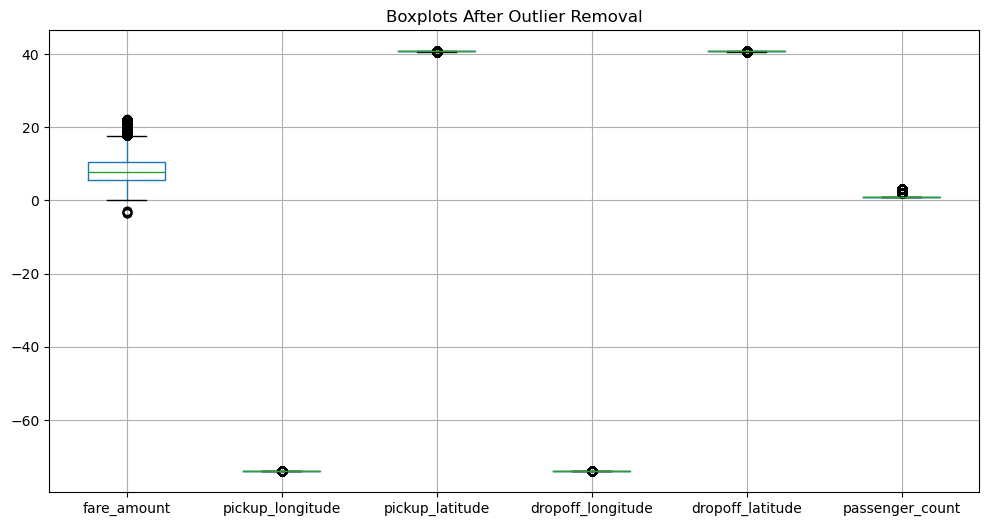

In [25]:
data_cleaned.boxplot(figsize=(12,6))
plt.title("Boxplots After Outlier Removal")
plt.show()

##If you see outliers after plotting the box plot again dont worry you code is not wrong it happens because 
#the Qyartiles Q1 and Q3 change values

#For example:
#When you first plot the boxplot
#The quartiles are calculated using all your data, including extreme points.
#Example:
#Let’s say your prices are:
#[50, 55, 60, 70, 75, 80, 90, 100, 3000]

#Here, 3000 is a big outlier.
#Q1 = 60
#Q3 = 90
#IQR = 90 − 60 = 30
#Upper limit = Q3 + 1.5×IQR = 90 + 45 = 135
#So any value above 135 is considered an outlier (3000 will be removed).

#After you remove 3000 and plot again
#Your new data is:
#[50, 55, 60, 70, 75, 80, 90, 100]
#Now your quartiles will change:
#Q1 = 60
#Q3 = 85
#IQR = 25
#Upper limit = 85 + 1.5×25 = 122.5
#Now even 100, which was fine before, might look close to the upper whisker or even outside 
#it on the new boxplot.

#That’s why you still see dots (mild outliers) — because every time you remove points and replot,
#Q1, Q3, and IQR are recalculated based on the new, smaller dataset.

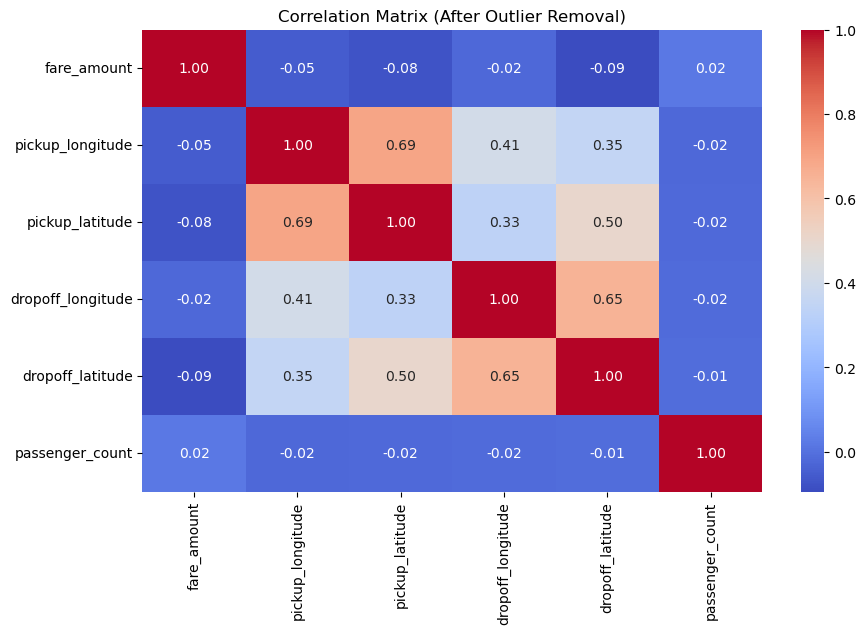

In [26]:
num_df = data_cleaned.select_dtypes(include=[np.number])#selects all numerical
#columns from the df_cleaned dataset(the dataset in which we removed outliers)
corr_matrix = num_df.corr()#.corr calculates the correlation coeffient which ranges from -1 to 1 for
#each pair of numeric columns

plt.figure(figsize=(10,6))#Figure size is 10 inches wide and 6 inches in height
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (After Outlier Removal)")
plt.show()

#A heatmap is a colored grid that visually shows the strength of relationships (correlations) between variables.
#It uses colors to represent numbers — instead of just printing them as plain text.

#"annot” means annotation.
#When set to True, Seaborn will write the correlation value inside each square.
#Example: You’ll see numbers like 0.82, -0.03, etc. inside the boxes.

#cmap” stands for color map, which defines the color scheme of the heatmap.
#'coolwarm' means:
#Blue → negative correlation
#White → near zero (no correlation)
#Red → positive correlation
#It helps you instantly spot strong positive or negative relationships using colors.

#fmt=".2f"
#This controls how the numbers (correlation values) are displayed.
#".2f" means two decimal places, e.g., 0.82 instead of 0.823465.
#It makes the heatmap clean and readable.

#In the below heatmap:-

#fare_amount has weak correlations(because negative values) with latitude, longitude, and passenger count.
#This means the fare does not directly depend on the raw GPS coordinates or passenger count.

#Correlation between pickup_longitude and pickup_latitude = 0.69
#It means High positive correlation, meaning pickup points tend to lie close together geographically

#Correlation between dropoff_longitude and dropoff_latitude = 0.65
#Also a strong positive correlation — dropoff locations are geographically related (within the same region/city).

#Very low correlation with all columns (~0.0).
#Meaning number of passengers doesn’t significantly influence coordinates or fare amount.

In [27]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [28]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [29]:
pip install geopy


   ---------------------------------------- 2/2 [geopy]

Note: you may need to restart the kernel to use updated packages.


In [30]:
from geopy.distance import geodesic#geopy is python library which helps to calculate
#geographical distances 
#The geodesic() function finds the real-world distance between 
#two latitude–longitude points on Earth’s surface,
#So it gives accurate distances in kilometers or miles — just like Google Maps would

def calculate_distance(row):#Every row in the dataset has some latitude and longitude values so this will calculate distance
    #between the drop location and pickup location for every row
    pickup = (row['pickup_latitude'], row['pickup_longitude'])#We store the pickup latiude and longitude of each record
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])#We store the drop off latitude and longitude of each record
    return geodesic(pickup, dropoff).km#geodesic() calculates the distance in kilometers between these two points.
#.km converts the result to kilometers(if you want to use miles then use .miles)
df['distance_km'] = df.apply(calculate_distance, axis=1)#.apply() runs your function row by row across the DataFrame
#axis=1 means “apply along rows

#df['distance_km']:-This creates a new column in your DataFrame called distance_km.
#It stores the distance (in kilometers) for each trip.


C:\Users\Hitesh\AppData\Local\Temp\ipykernel_14768\2215429808.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_km'] = df.apply(calculate_distance, axis=1)#.apply() runs your function row by row across the DataFrame


In [31]:
upper_limit = df['distance_km'].quantile(0.99)
#It Gives me the value of  distance (in km)(in newly created distance column) below which 99% of the trips fall.
upper_limit#See the value is 20.7403 means 99% of the trips in data have distance less than or equal to this

np.float64(20.740321150515864)

In [32]:
upper_limit = df['fare_amount'].quantile(0.99)
#It Gives me the value of fare_amount below which 99% of the trips fall.                                        
upper_limit#See the value is 53.361 means 99% of the trips in data have fare amount less than or equal to this

np.float64(53.36910000000178)

In [33]:
#Remove fares <= 0 or very large and distance km<100(outliers):
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[df['distance_km'] < 100]

In [34]:
# Extract useful features
#I converted the pickup datetime column into a proper datetime format using pd.to_datetime().
#Then, I extracted hour, day, month, and year as separate columns because time-based features strongly influence fare prices.
#For example, fares may increase during peak hours, weekends, or specific months due to demand or weather conditions

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour#Extracting the hour from pickup_datetime column
df['day'] = df['pickup_datetime'].dt.dayofweek#Extracting the day of the week from pickup_datetime column
df['month'] = df['pickup_datetime'].dt.month#Extracting the month from pickup_datetime column
df['year'] = df['pickup_datetime'].dt.year#Extracting the year from pickup_datetime column

#We did this for only pickup_dateime column because no dropoff_datetime column is there in dataset

In [35]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour,day,month,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,19,3,5,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,20,4,7,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,21,0,8,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,8,4,6,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,17,3,8,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,10,6,10,2012
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,1,4,3,2014
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,0,0,6,2009
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,14,2,5,2015


<Axes: >

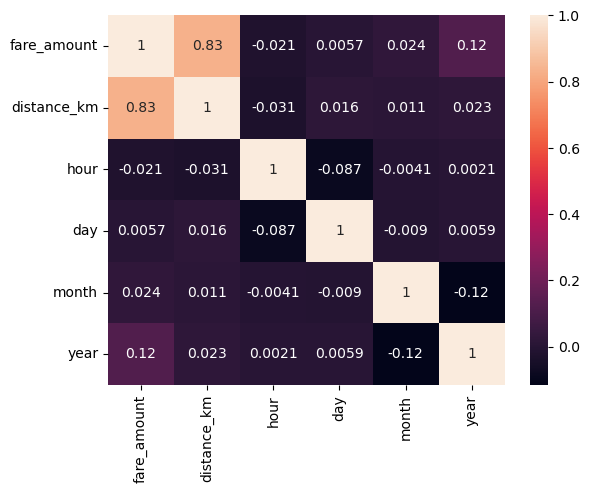

In [36]:
sns.heatmap(df[['fare_amount', 'distance_km', 'hour', 'day', 'month', 'year']].corr(), annot=True)
#As the trip distance increases, the fare also increases. This confirms that distance_km is the main factor affecting fare amount.

#−0.02 (very weak)":-The time of day (hour) has almost no effect on fare. So fares don’t depend much on the exact hour.

#fare_amount ↔ day
#0.0057 (very weak)The day of the week doesn’t influence fare significantly — Uber fares are fairly stable across days.

In [37]:
# Select features
features = ['distance_km', 'hour', 'day', 'month', 'year']#These columns are selected because they are logically related to the fare.
#These are the input features/columns(X) to the model
X = df[features]#all column names stored in features variable above are made input columns 
y = df['fare_amount']#Target column means we have to predict fare thats why fare_amount made as target column

from sklearn.preprocessing import StandardScaler#You might know that sklearn is a very popular Python 
#library used for Machine Learning
#From sklearn library we use pre-processing module to standardize our dataset.As the pre-processing
#module contains Standard Scaler which is a class(tool) which helps to standardize the dataset.
#Standardization means we transform the data in such a way such that its mean(average) is zero and standard 
#deviation  is 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Standardization is also called as Z-Score Normalization whose formula is 
#z score/X dash=(x−μ)/σ
#where x is the value in that particular column and μ is the mean of that particular column and σ is standard
#deviation of that particular column.You can see the mean and standard deviation for every column from
#the df.describe() command used above in the code

#Due to Standard Scaler every column of our dataset will now have the mean=0 and standard deviation as 1
#Split the dataset into training and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (158970, 5)
Testing set shape: (39743, 5)


In [38]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour,day,month,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,19,3,5,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,20,4,7,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,21,0,8,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,8,4,6,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,17,3,8,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,10,6,10,2012
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,1,4,3,2014
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,0,0,6,2009
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,14,2,5,2015


In [39]:
#I have not included theory of Linear,Lasso and Ridge Regression here
#You can refer my Machine Learning Unit-2 Notes for it

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train the model
lr = LinearRegression()#Creating object of Linear regression
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

##We know that error=actual value(y_test)-my model predicted value(y_pred) 

#So in MAE(Mean Absolute Error)we calculate the summation of all errors and we take absolute value of that 
#so that negative value is also positive.The formula of MAE is 1/n summation(i=1 to n)|y-y'| where y is the actual value
#(y_test) and y' is predicted value(y_pred) and n is the n is no.of data point(means no.of rows in training dataset)

#So in MSE(Mean Squared Error)we calculate the summation of all errors.The formula of MAE is 1/n summation(i=1 to n)(y-y')^2 where y is the actual value
#(y_test) and y' is predicted value(y_pred) and n is the n is no.of data point(means no.of rows in training dataset).The
#only difference is that in MAE we were taking absolute value but here in MSE we are taking the square of the error

#R2 score tells that how close are the data points from the best fit line
#The formula is (y-y bar)^2/(y_predicted - y bar)^2 where y is actual values means y_test,y bar is the mean of y_test(means
#we will do summation of all y values  and divide by total number of values to get the mean(y bar)) and y predicted
#is the predicted values(y_pred).It gives result between 0 and 1 


🔹 Linear Regression Results:
RMSE: 5.16
R² Score: 0.7034


In [40]:
#Performing Ridge Regression
from sklearn.linear_model import Ridge#importing Ridge from sklearn
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train the model
ridge = Ridge(alpha=1.0)#Lower alpha value can cause underfitting in the model
#Larger alpha value can cause overfitting in the model
ridge.fit(X_train, y_train)#The .fit() method trains the Ridge model on your training data (X_train, y_train).
#It learns how features (like distance, hour, etc.) are related to the target (fare_amount).

# Predict on test data
y_pred_ridge = ridge.predict(X_test)#The trained model predicts the fare amount for unseen (test) data.
#y_pred_ridge now holds the predicted fare values.

# Evaluate model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))#RMSE is the square root of MSE
r2_ridge = r2_score(y_test, y_pred_ridge)#Calculating R2 score

print("🔹 Ridge Regression Results:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.4f}")

🔹 Ridge Regression Results:
RMSE: 5.16
R² Score: 0.7034


In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train the model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("🔹 Lasso Regression Results:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.4f}")

🔹 Lasso Regression Results:
RMSE: 5.17
R² Score: 0.7028


In [42]:
print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")
print(f"Lasso Regression R²: {r2_lasso:.4f}")

Linear Regression R²: 0.7034
Ridge Regression R²: 0.7034
Lasso Regression R²: 0.7028


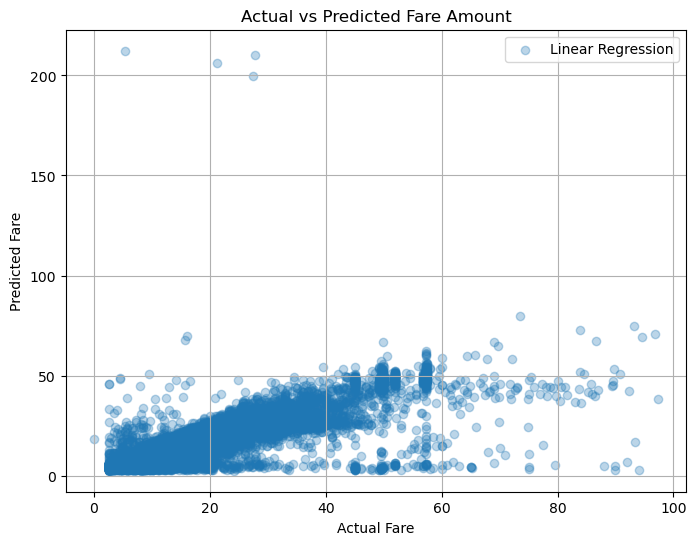

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare Amount")
plt.legend()
plt.grid(True)
plt.show()

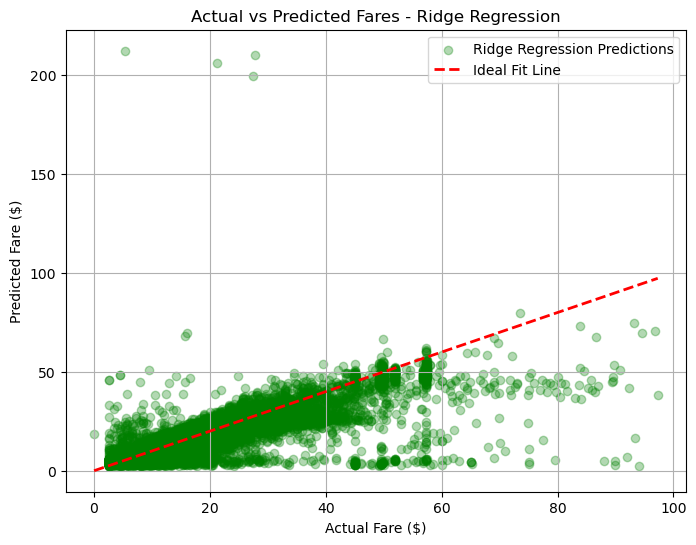

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3, color='green', label='Ridge Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Actual vs Predicted Fares - Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()


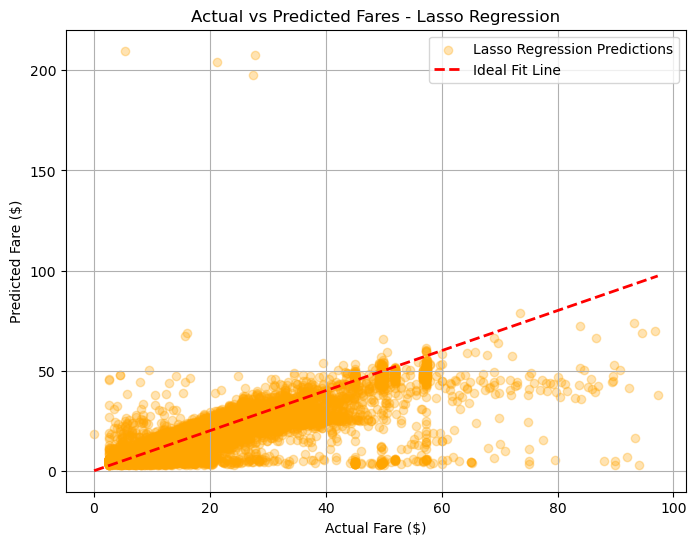

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.3, color='orange', label='Lasso Regression Predictions')
#Controls transparency of the points (0 = invisible, 1 = solid).
#Setting it to 0.3 makes overlapping points visible — helps in dense datasets
#color='orange':-Makes the scatter points orange (you can use any color like ‘blue’, ‘green’, etc.)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
#r-- draws dotted red color Ideal fit line
#Finds the minimum and maximum actual fare values in your test set.
#Creates two points: one at the lowest fare and one at the highest fare.
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Actual vs Predicted Fares - Lasso Regression")
plt.legend()
plt.grid(True)#Draws grid lines
plt.show()

#a. [y_test.min(), y_test.max()]
#Finds the minimum and maximum actual fare values in your test set.
#Creates two points: one at the lowest fare and one at the highest fare.
#Example:
#If y_test has values between ₹3 and ₹60,
#then [y_test.min(), y_test.max()] → [3, 60].

#b. Second [y_test.min(), y_test.max()]
#Same as above, but used for the Y-axis.
#So now the line connects two points: (3, 3) and (60, 60).
#This creates a perfect diagonal line — where the predicted value equals the actual value.

#lw” means line width.
#lw=2 makes the line slightly thicker for visibility.

#label='Ideal Fit Line'
#Gives the line a label for the plot legend.
#When you call plt.legend(), this label appears on the chart.